# Statistical Thinking: Probability & Distributions
## Slides 10-14: Interactive Visual Demonstrations

This notebook provides visual demonstrations for slides 10-14. Run cells as you present each slide.

---

In [1]:
# Import all required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("✓ All libraries loaded successfully!")

✓ All libraries loaded successfully!


---
# SLIDE 10: Continuous Probability Distributions

**Key Ideas:**
- Continuous = outcomes in a range (not countable)
- **Normal:** Bell curve, most values near middle
- **Uniform:** All values equally likely
- **Exponential:** Waiting times between events
- **Beta:** Uncertainty about probabilities

**Real-World Examples:** Delivery times, random selection, bus waits, conversion rates

---

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_79583/2235239594.py:112: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


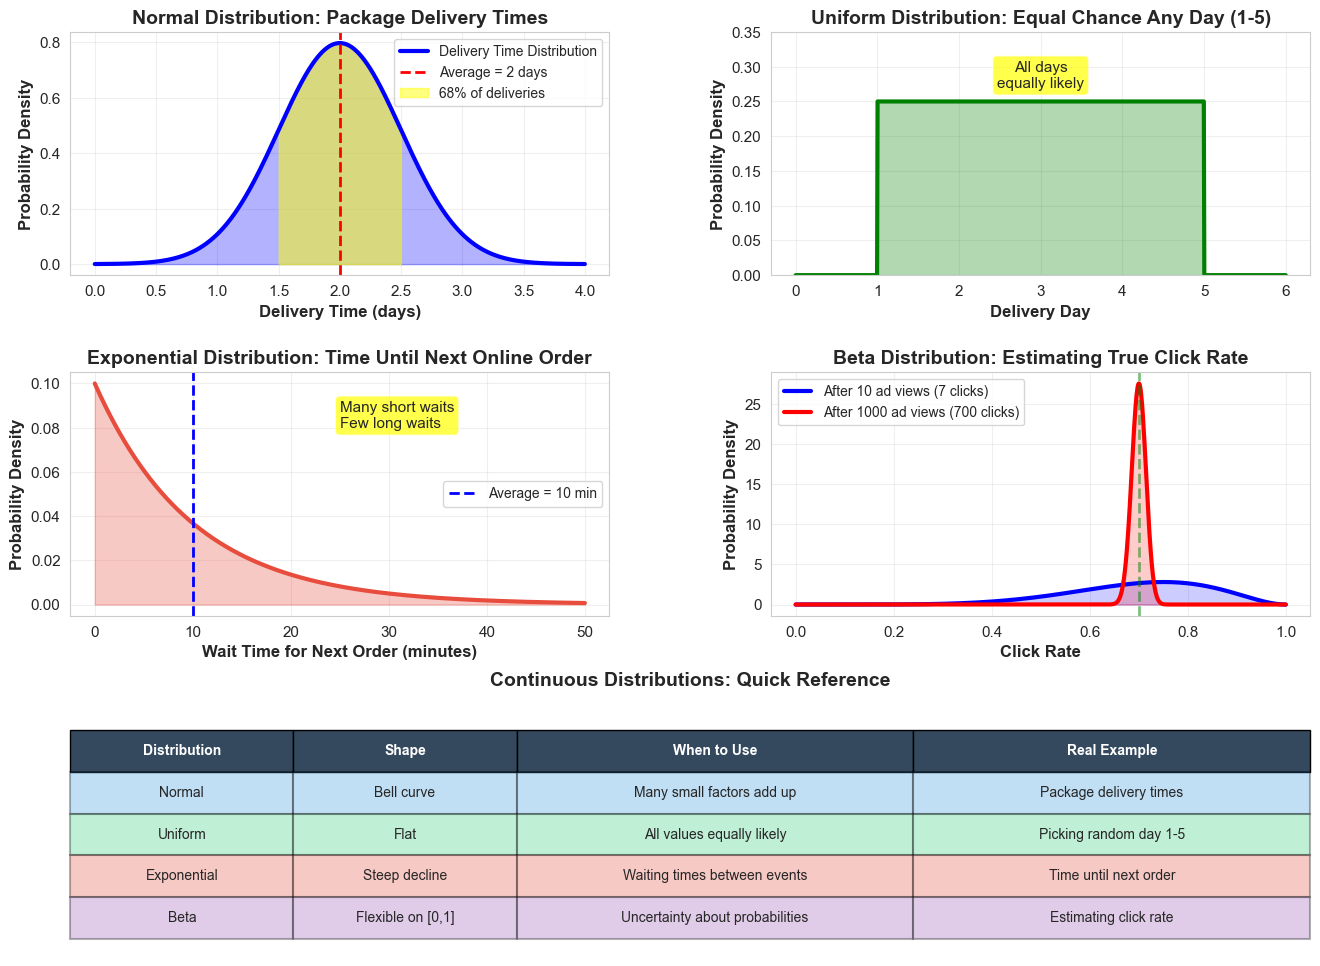


📊 KEY TAKEAWAYS:
• Normal: Most common, natural variation (heights, delivery times)
• Uniform: Fair randomness (lottery, simulations)
• Exponential: Many short events, few long ones (wait times)
• Beta: Uncertainty narrows as you collect more data


In [2]:
# SLIDE 10 VISUALIZATION: Continuous Probability Distributions

fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, hspace=0.4, wspace=0.3)

# 1. NORMAL: Delivery times
ax1 = fig.add_subplot(gs[0, 0])
mu, sigma = 2, 0.5
x = np.linspace(0, 4, 1000)
y = stats.norm.pdf(x, mu, sigma)

ax1.plot(x, y, 'b-', linewidth=3, label='Delivery Time Distribution')
ax1.fill_between(x, y, alpha=0.3, color='blue')
ax1.axvline(mu, color='red', linestyle='--', linewidth=2, label=f'Average = {mu} days')
ax1.set_xlabel('Delivery Time (days)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Probability Density', fontsize=12, fontweight='bold')
ax1.set_title('Normal Distribution: Package Delivery Times', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

x_fill = x[(x >= mu-sigma) & (x <= mu+sigma)]
y_fill = stats.norm.pdf(x_fill, mu, sigma)
ax1.fill_between(x_fill, y_fill, alpha=0.5, color='yellow', label='68% of deliveries')
ax1.legend(fontsize=10)

# 2. UNIFORM: Random selection
ax2 = fig.add_subplot(gs[0, 1])
a, b = 1, 5
x = np.linspace(0, 6, 1000)
y = stats.uniform.pdf(x, a, b-a)

ax2.plot(x, y, 'g-', linewidth=3)
ax2.fill_between(x, y, alpha=0.3, color='green')
ax2.set_xlabel('Delivery Day', fontsize=12, fontweight='bold')
ax2.set_ylabel('Probability Density', fontsize=12, fontweight='bold')
ax2.set_title('Uniform Distribution: Equal Chance Any Day (1-5)', fontsize=14, fontweight='bold')
ax2.set_ylim(0, 0.35)
ax2.grid(True, alpha=0.3)
ax2.text(3, 0.27, 'All days\nequally likely', ha='center', fontsize=11, 
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# 3. EXPONENTIAL: Wait times
ax3 = fig.add_subplot(gs[1, 0])
rate = 0.1
x = np.linspace(0, 50, 1000)
y = stats.expon.pdf(x, scale=1/rate)

ax3.plot(x, y, color='#e74c3c', linewidth=3)
ax3.fill_between(x, y, alpha=0.3, color='#e74c3c')
ax3.axvline(1/rate, color='blue', linestyle='--', linewidth=2, label=f'Average = {1/rate:.0f} min')
ax3.set_xlabel('Wait Time for Next Order (minutes)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Probability Density', fontsize=12, fontweight='bold')
ax3.set_title('Exponential Distribution: Time Until Next Online Order', fontsize=14, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)
ax3.text(25, 0.08, 'Many short waits\nFew long waits', fontsize=11, 
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# 4. BETA: Uncertainty about conversion rate
ax4 = fig.add_subplot(gs[1, 1])
x = np.linspace(0, 1, 1000)

alpha1, beta1 = 7, 3
y1 = stats.beta.pdf(x, alpha1, beta1)
ax4.plot(x, y1, 'b-', linewidth=3, label='After 10 ad views (7 clicks)')
ax4.fill_between(x, y1, alpha=0.2, color='blue')

alpha2, beta2 = 700, 300
y2 = stats.beta.pdf(x, alpha2, beta2)
ax4.plot(x, y2, 'r-', linewidth=3, label='After 1000 ad views (700 clicks)')
ax4.fill_between(x, y2, alpha=0.2, color='red')

ax4.set_xlabel('Click Rate', fontsize=12, fontweight='bold')
ax4.set_ylabel('Probability Density', fontsize=12, fontweight='bold')
ax4.set_title('Beta Distribution: Estimating True Click Rate', fontsize=14, fontweight='bold')
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)
ax4.axvline(0.7, color='green', linestyle='--', linewidth=2, alpha=0.5)

# 5. COMPARISON TABLE
ax5 = fig.add_subplot(gs[2, :])
ax5.axis('tight')
ax5.axis('off')

table_data = [
    ['Distribution', 'Shape', 'When to Use', 'Real Example'],
    ['Normal', 'Bell curve', 'Many small factors add up', 'Package delivery times'],
    ['Uniform', 'Flat', 'All values equally likely', 'Picking random day 1-5'],
    ['Exponential', 'Steep decline', 'Waiting times between events', 'Time until next order'],
    ['Beta', 'Flexible on [0,1]', 'Uncertainty about probabilities', 'Estimating click rate']
]

table = ax5.table(cellText=table_data, cellLoc='center', loc='center', colWidths=[0.18, 0.18, 0.32, 0.32])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)

for i in range(4):
    table[(0, i)].set_facecolor('#34495e')
    table[(0, i)].set_text_props(weight='bold', color='white')

colors_table = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6']
for i in range(1, 5):
    for j in range(4):
        table[(i, j)].set_facecolor(colors_table[i-1])
        table[(i, j)].set_alpha(0.3)
        table[(i, j)].set_edgecolor('black')
        table[(i, j)].set_linewidth(1.5)

ax5.set_title('Continuous Distributions: Quick Reference', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n📊 KEY TAKEAWAYS:")
print("• Normal: Most common, natural variation (heights, delivery times)")
print("• Uniform: Fair randomness (lottery, simulations)")
print("• Exponential: Many short events, few long ones (wait times)")
print("• Beta: Uncertainty narrows as you collect more data")

---
# SLIDE 11: The Normal Distribution

**Key Ideas:**
- The famous **bell curve**
- Most values cluster around the mean
- Defined by mean (center) and standard deviation (spread)
- **68-95-99.7 Rule:** 68% within 1 SD, 95% within 2 SD, 99.7% within 3 SD

**Real-World Example:** Student heights, delivery times, test scores

---

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_79583/687400222.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


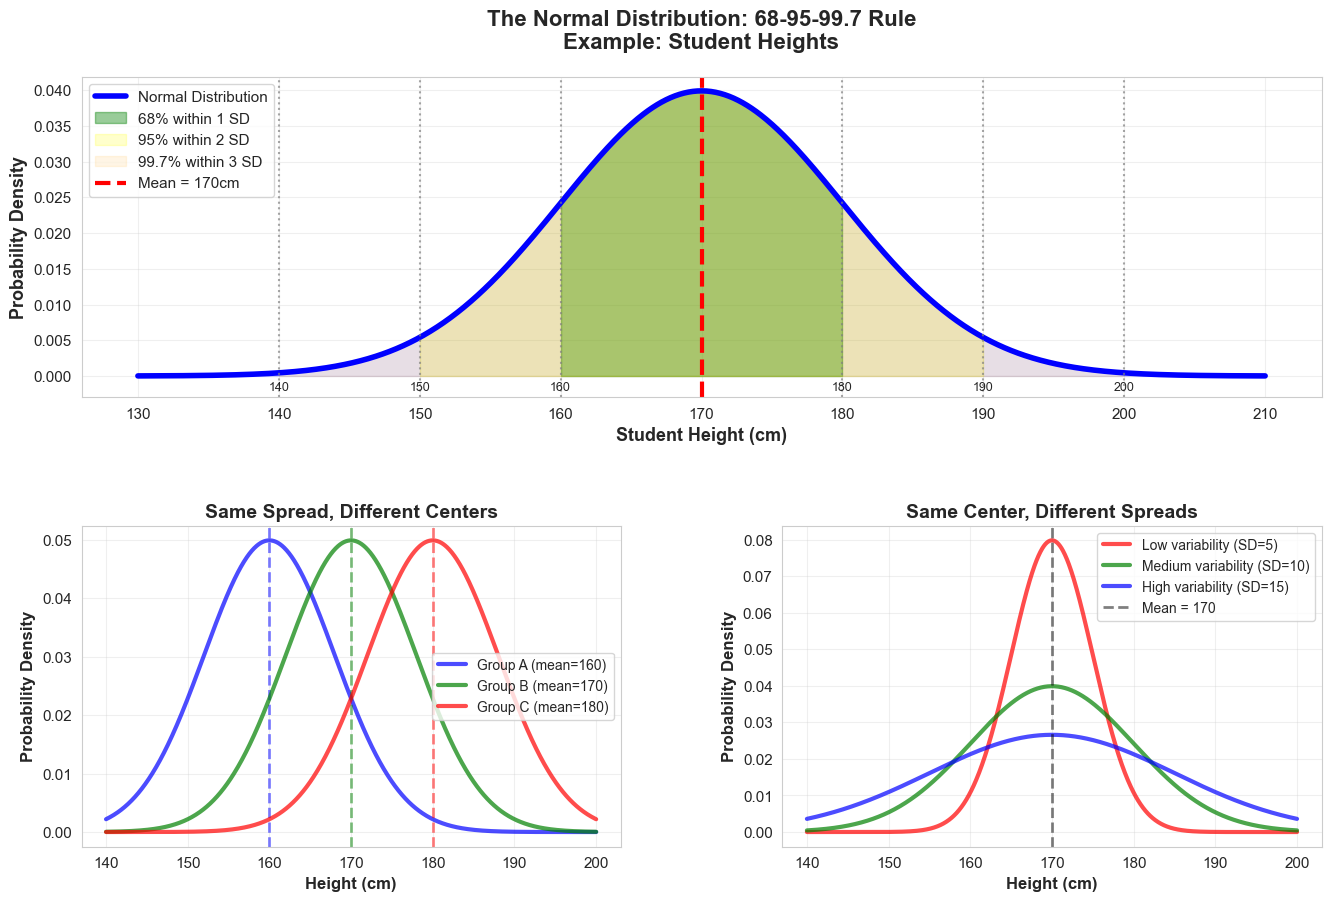


📊 KEY TAKEAWAYS:
• Normal distribution = bell curve (symmetric, most values near center)
• 68% of data within 1 standard deviation of mean
• 95% within 2 standard deviations
• 99.7% within 3 standard deviations
• Common in nature: heights, test scores, delivery times


In [3]:
# SLIDE 11 VISUALIZATION: The Normal Distribution

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, hspace=0.4, wspace=0.3)

# 1. Classic Bell Curve with 68-95-99.7 Rule
ax1 = fig.add_subplot(gs[0, :])
mu, sigma = 170, 10
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = stats.norm.pdf(x, mu, sigma)

ax1.plot(x, y, 'b-', linewidth=4, label='Normal Distribution')
ax1.fill_between(x, y, alpha=0.1, color='blue')

# 68% (1 SD)
x1 = x[(x >= mu-sigma) & (x <= mu+sigma)]
y1 = stats.norm.pdf(x1, mu, sigma)
ax1.fill_between(x1, y1, alpha=0.4, color='green', label='68% within 1 SD')

# 95% (2 SD)
x2 = x[(x >= mu-2*sigma) & (x <= mu+2*sigma)]
y2 = stats.norm.pdf(x2, mu, sigma)
ax1.fill_between(x2, y2, alpha=0.2, color='yellow', label='95% within 2 SD')

# 99.7% (3 SD)
x3 = x[(x >= mu-3*sigma) & (x <= mu+3*sigma)]
y3 = stats.norm.pdf(x3, mu, sigma)
ax1.fill_between(x3, y3, alpha=0.1, color='orange', label='99.7% within 3 SD')

ax1.axvline(mu, color='red', linestyle='--', linewidth=3, label=f'Mean = {mu}cm')
for i in range(-3, 4):
    if i != 0:
        ax1.axvline(mu + i*sigma, color='gray', linestyle=':', linewidth=1.5, alpha=0.7)
        ax1.text(mu + i*sigma, -0.002, f'{mu + i*sigma}', ha='center', fontsize=9)

ax1.set_xlabel('Student Height (cm)', fontsize=13, fontweight='bold')
ax1.set_ylabel('Probability Density', fontsize=13, fontweight='bold')
ax1.set_title('The Normal Distribution: 68-95-99.7 Rule\nExample: Student Heights', fontsize=16, fontweight='bold', pad=20)
ax1.legend(fontsize=11, loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(bottom=-0.003)

# 2. Different Means, Same SD
ax2 = fig.add_subplot(gs[1, 0])
x = np.linspace(140, 200, 1000)

for mean, color, label in [(160, 'blue', 'Group A (mean=160)'),
                            (170, 'green', 'Group B (mean=170)'),
                            (180, 'red', 'Group C (mean=180)')]:
    y = stats.norm.pdf(x, mean, 8)
    ax2.plot(x, y, linewidth=3, color=color, label=label, alpha=0.7)
    ax2.axvline(mean, linestyle='--', linewidth=2, color=color, alpha=0.5)

ax2.set_xlabel('Height (cm)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Probability Density', fontsize=12, fontweight='bold')
ax2.set_title('Same Spread, Different Centers', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# 3. Same Mean, Different SDs
ax3 = fig.add_subplot(gs[1, 1])
x = np.linspace(140, 200, 1000)
mean = 170

for sd, color, label in [(5, 'red', 'Low variability (SD=5)'),
                          (10, 'green', 'Medium variability (SD=10)'),
                          (15, 'blue', 'High variability (SD=15)')]:
    y = stats.norm.pdf(x, mean, sd)
    ax3.plot(x, y, linewidth=3, color=color, label=label, alpha=0.7)

ax3.axvline(mean, linestyle='--', linewidth=2, color='black', alpha=0.5, label='Mean = 170')
ax3.set_xlabel('Height (cm)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Probability Density', fontsize=12, fontweight='bold')
ax3.set_title('Same Center, Different Spreads', fontsize=14, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 KEY TAKEAWAYS:")
print("• Normal distribution = bell curve (symmetric, most values near center)")
print("• 68% of data within 1 standard deviation of mean")
print("• 95% within 2 standard deviations")
print("• 99.7% within 3 standard deviations")
print("• Common in nature: heights, test scores, delivery times")

---
# SLIDE 12: The Binomial Distribution

**Key Ideas:**
- Counts successes in a fixed number of tries
- Two outcomes: success or failure
- Each trial has same probability
- Used for: coin flips, customer conversions, yes/no surveys

**Real-World Example:** Email campaign open rates

---

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_79583/642013859.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


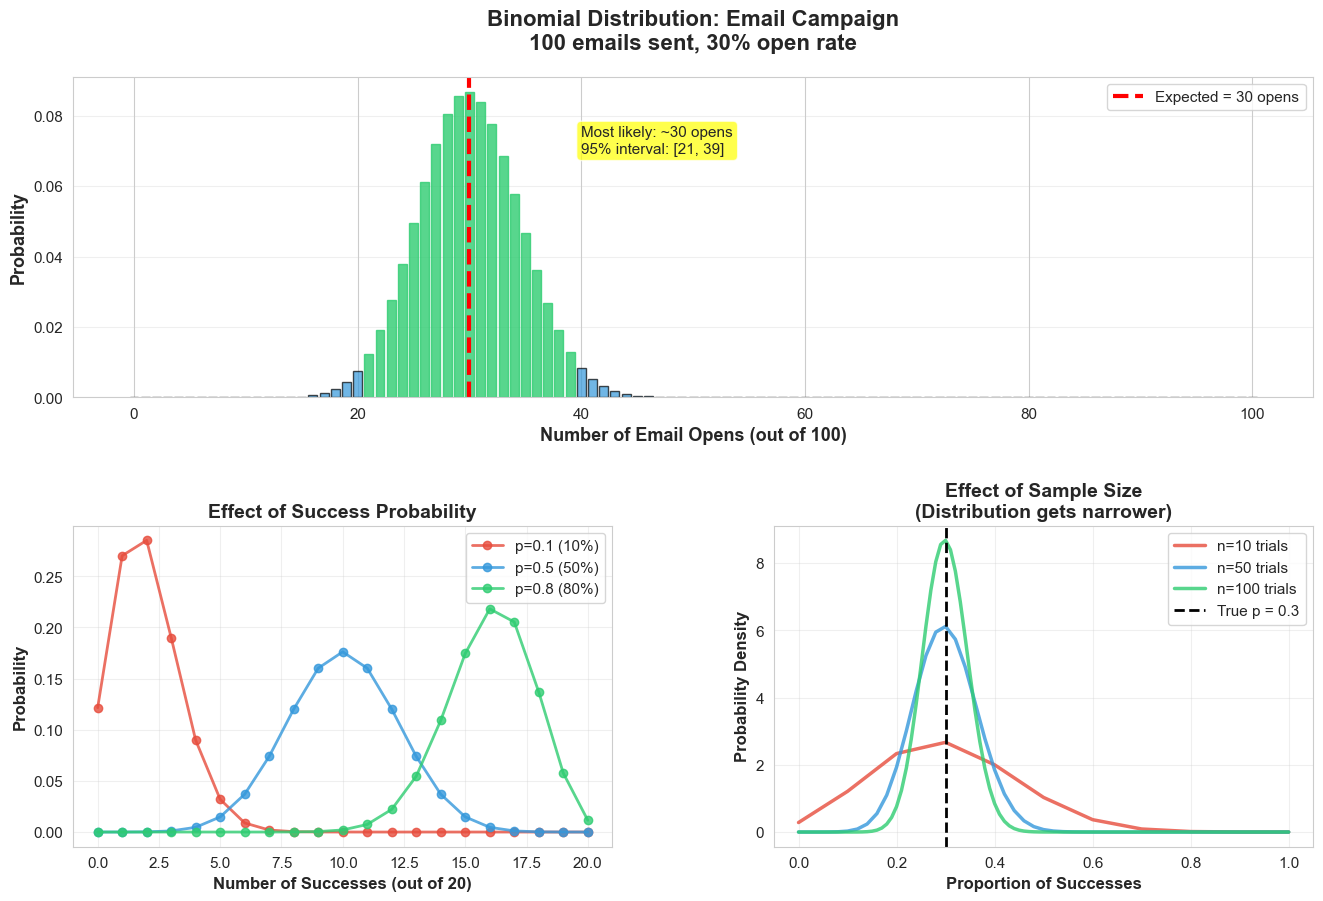


INTERACTIVE EXAMPLE: Email Campaign Calculator

If you send 100 emails with a 30% open rate:
  • Expected opens: 30.0
  • Standard deviation: 4.6
  • Likely range (±1 SD): [25, 35]

Probability Calculations:
  • P(30 or more opens) = 53.8%
  • P(exactly 30 opens) = 8.7%

📊 KEY TAKEAWAYS:
• Binomial answers: 'Out of N tries, how many successes?'
• Higher success probability → distribution shifts right
• Larger sample size → distribution gets narrower and more predictable
• Perfect for A/B testing and conversion rate analysis


In [4]:
# SLIDE 12 VISUALIZATION: The Binomial Distribution

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, hspace=0.4, wspace=0.3)

# 1. Email Campaign Example
ax1 = fig.add_subplot(gs[0, :])
n, p = 100, 0.30
x = np.arange(0, n+1)
pmf = stats.binom.pmf(x, n, p)

bars = ax1.bar(x, pmf, color='#3498db', alpha=0.7, edgecolor='black', linewidth=1)

expected = n * p
ax1.axvline(expected, color='red', linestyle='--', linewidth=3, label=f'Expected = {expected:.0f} opens')

lower, upper = stats.binom.ppf([0.025, 0.975], n, p)
for i, bar in enumerate(bars):
    if lower <= i <= upper:
        bar.set_color('#2ecc71')
        bar.set_alpha(0.8)

ax1.set_xlabel('Number of Email Opens (out of 100)', fontsize=13, fontweight='bold')
ax1.set_ylabel('Probability', fontsize=13, fontweight='bold')
ax1.set_title('Binomial Distribution: Email Campaign\n100 emails sent, 30% open rate', fontsize=16, fontweight='bold', pad=20)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3, axis='y')

ax1.text(expected + 10, max(pmf) * 0.8, 
         f'Most likely: ~{expected:.0f} opens\n95% interval: [{lower:.0f}, {upper:.0f}]',
         fontsize=11, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# 2. Different success probabilities
ax2 = fig.add_subplot(gs[1, 0])
n = 20
x = np.arange(0, n+1)

for prob, color, label in [(0.1, '#e74c3c', 'p=0.1 (10%)'),
                            (0.5, '#3498db', 'p=0.5 (50%)'),
                            (0.8, '#2ecc71', 'p=0.8 (80%)')]:
    pmf = stats.binom.pmf(x, n, prob)
    ax2.plot(x, pmf, 'o-', linewidth=2, markersize=6, color=color, label=label, alpha=0.8)

ax2.set_xlabel('Number of Successes (out of 20)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Probability', fontsize=12, fontweight='bold')
ax2.set_title('Effect of Success Probability', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

# 3. Different sample sizes
ax3 = fig.add_subplot(gs[1, 1])
p = 0.3

for n_val, color, label in [(10, '#e74c3c', 'n=10 trials'),
                             (50, '#3498db', 'n=50 trials'),
                             (100, '#2ecc71', 'n=100 trials')]:
    x = np.arange(0, n_val+1)
    pmf = stats.binom.pmf(x, n_val, p)
    ax3.plot(x/n_val, pmf * n_val, linewidth=2.5, color=color, label=label, alpha=0.8)

ax3.axvline(p, color='black', linestyle='--', linewidth=2, label=f'True p = {p}')
ax3.set_xlabel('Proportion of Successes', fontsize=12, fontweight='bold')
ax3.set_ylabel('Probability Density', fontsize=12, fontweight='bold')
ax3.set_title('Effect of Sample Size\n(Distribution gets narrower)', fontsize=14, fontweight='bold')
ax3.legend(fontsize=11)
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("INTERACTIVE EXAMPLE: Email Campaign Calculator")
print("="*60)

n_emails = 100
open_rate = 0.30

expected_opens = n_emails * open_rate
std_dev = np.sqrt(n_emails * open_rate * (1 - open_rate))

print(f"\nIf you send {n_emails} emails with a {open_rate:.0%} open rate:")
print(f"  • Expected opens: {expected_opens:.1f}")
print(f"  • Standard deviation: {std_dev:.1f}")
print(f"  • Likely range (±1 SD): [{expected_opens-std_dev:.0f}, {expected_opens+std_dev:.0f}]")

prob_30_or_more = 1 - stats.binom.cdf(29, n_emails, open_rate)
prob_exactly_30 = stats.binom.pmf(30, n_emails, open_rate)

print(f"\nProbability Calculations:")
print(f"  • P(30 or more opens) = {prob_30_or_more:.1%}")
print(f"  • P(exactly 30 opens) = {prob_exactly_30:.1%}")

print("\n📊 KEY TAKEAWAYS:")
print("• Binomial answers: 'Out of N tries, how many successes?'")
print("• Higher success probability → distribution shifts right")
print("• Larger sample size → distribution gets narrower and more predictable")
print("• Perfect for A/B testing and conversion rate analysis")

---
# SLIDE 13: The Uniform Distribution

**Key Ideas:**
- All outcomes are equally likely
- Flat distribution (no peaks)
- **Discrete:** die roll, lottery
- **Continuous:** random number between 0 and 1

**Real-World Example:** Simulations, random selection, fair games

---

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_79583/824444465.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


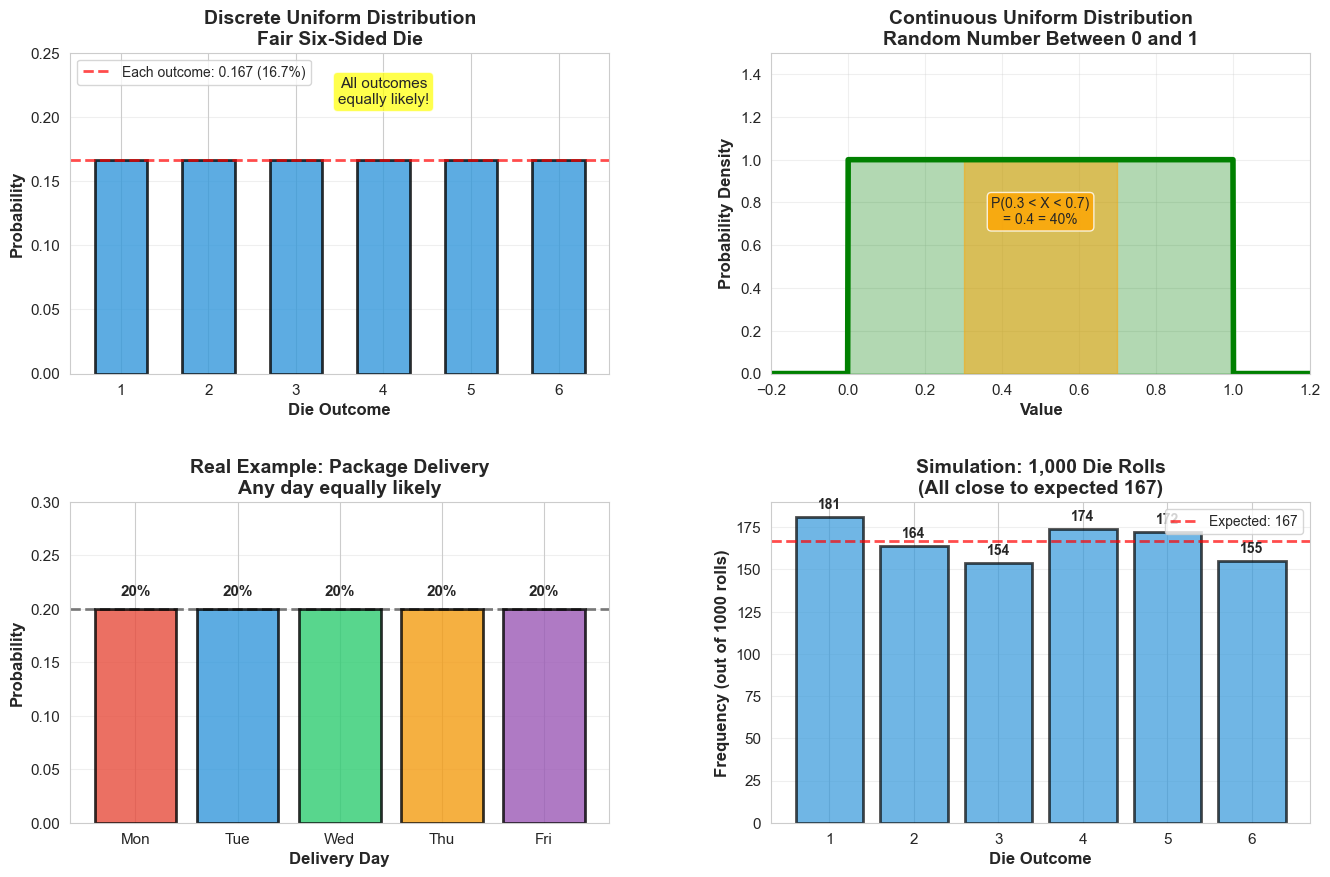


INTERACTIVE CALCULATION

Discrete Uniform (Die Roll):
  • 6 possible outcomes
  • Each has probability: 1/6 = 0.1667 = 16.67%
  • P(rolling 1, 2, or 3) = 3/6 = 50%

Continuous Uniform (0 to 1):
  • Any value between 0 and 1 possible
  • P(0.2 < X < 0.5) = 0.5 - 0.2 = 0.3 = 30%
  • Probability = length of interval

📊 KEY TAKEAWAYS:
• Uniform = 'fair' distribution, no favorites
• Discrete: all outcomes have same probability (die, lottery)
• Continuous: probability = length of interval
• Used in simulations and random sampling


In [5]:
# SLIDE 13 VISUALIZATION: The Uniform Distribution

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, hspace=0.4, wspace=0.3)

# 1. Discrete Uniform: Fair Die
ax1 = fig.add_subplot(gs[0, 0])
outcomes = ['1', '2', '3', '4', '5', '6']
probabilities = [1/6] * 6

bars = ax1.bar(outcomes, probabilities, color='#3498db', alpha=0.8, edgecolor='black', linewidth=2, width=0.6)
ax1.set_ylabel('Probability', fontsize=12, fontweight='bold')
ax1.set_xlabel('Die Outcome', fontsize=12, fontweight='bold')
ax1.set_title('Discrete Uniform Distribution\nFair Six-Sided Die', fontsize=14, fontweight='bold')
ax1.set_ylim(0, 0.25)
ax1.axhline(1/6, color='red', linestyle='--', linewidth=2, label=f'Each outcome: {1/6:.3f} (16.7%)', alpha=0.7)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3, axis='y')

ax1.text(3, 0.21, 'All outcomes\nequally likely!', ha='center', fontsize=11,
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# 2. Continuous Uniform
ax2 = fig.add_subplot(gs[0, 1])
x = np.linspace(-0.2, 1.2, 1000)
y = stats.uniform.pdf(x, 0, 1)

ax2.plot(x, y, 'g-', linewidth=4)
ax2.fill_between(x, y, alpha=0.3, color='green')
ax2.set_xlabel('Value', fontsize=12, fontweight='bold')
ax2.set_ylabel('Probability Density', fontsize=12, fontweight='bold')
ax2.set_title('Continuous Uniform Distribution\nRandom Number Between 0 and 1', fontsize=14, fontweight='bold')
ax2.set_xlim(-0.2, 1.2)
ax2.set_ylim(0, 1.5)
ax2.grid(True, alpha=0.3)

x_shade = x[(x >= 0.3) & (x <= 0.7)]
y_shade = stats.uniform.pdf(x_shade, 0, 1)
ax2.fill_between(x_shade, y_shade, alpha=0.5, color='orange')
ax2.text(0.5, 0.7, 'P(0.3 < X < 0.7)\n= 0.4 = 40%', ha='center', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='orange', alpha=0.8))

# 3. Real-World Example
ax3 = fig.add_subplot(gs[1, 0])
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
probs = [0.2] * 5

bars = ax3.bar(days, probs, color=['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6'], alpha=0.8, edgecolor='black', linewidth=2)
ax3.set_ylabel('Probability', fontsize=12, fontweight='bold')
ax3.set_xlabel('Delivery Day', fontsize=12, fontweight='bold')
ax3.set_title('Real Example: Package Delivery\nAny day equally likely', fontsize=14, fontweight='bold')
ax3.set_ylim(0, 0.3)
ax3.axhline(0.2, color='black', linestyle='--', linewidth=2, alpha=0.5)
ax3.grid(True, alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.01, '20%', ha='center', va='bottom', fontsize=11, fontweight='bold')

# 4. Simulation
ax4 = fig.add_subplot(gs[1, 1])
np.random.seed(42)
rolls = np.random.randint(1, 7, 1000)
counts = [np.sum(rolls == i) for i in range(1, 7)]

bars = ax4.bar(['1', '2', '3', '4', '5', '6'], counts, color='#3498db', alpha=0.7, edgecolor='black', linewidth=2)
ax4.axhline(1000/6, color='red', linestyle='--', linewidth=2, label=f'Expected: {1000/6:.0f}', alpha=0.7)
ax4.set_ylabel('Frequency (out of 1000 rolls)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Die Outcome', fontsize=12, fontweight='bold')
ax4.set_title('Simulation: 1,000 Die Rolls\n(All close to expected 167)', fontsize=14, fontweight='bold')
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3, axis='y')

for i, (bar, count) in enumerate(zip(bars, counts)):
    ax4.text(i, count + 5, str(count), ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("INTERACTIVE CALCULATION")
print("="*60)

print("\nDiscrete Uniform (Die Roll):")
print(f"  • 6 possible outcomes")
print(f"  • Each has probability: 1/6 = {1/6:.4f} = 16.67%")
print(f"  • P(rolling 1, 2, or 3) = 3/6 = 50%")

print("\nContinuous Uniform (0 to 1):")
print(f"  • Any value between 0 and 1 possible")
print(f"  • P(0.2 < X < 0.5) = 0.5 - 0.2 = 0.3 = 30%")
print(f"  • Probability = length of interval")

print("\n📊 KEY TAKEAWAYS:")
print("• Uniform = 'fair' distribution, no favorites")
print("• Discrete: all outcomes have same probability (die, lottery)")
print("• Continuous: probability = length of interval")
print("• Used in simulations and random sampling")

---
# SLIDE 14: Sampling Distribution & Central Limit Theorem (CLT)

**Key Ideas:**
- Take many samples, calculate average of each
- Those averages form a bell curve (normal distribution)
- Works even if original data ISN'T normal!
- Requires sample size ≥ 30 (rule of thumb)

**Real-World Example:** Polling voters - individual responses vary, but averages are predictable

---

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_79583/2815873964.py:114: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128499 (\N{BALLOT BOX WITH BALLOT}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: User

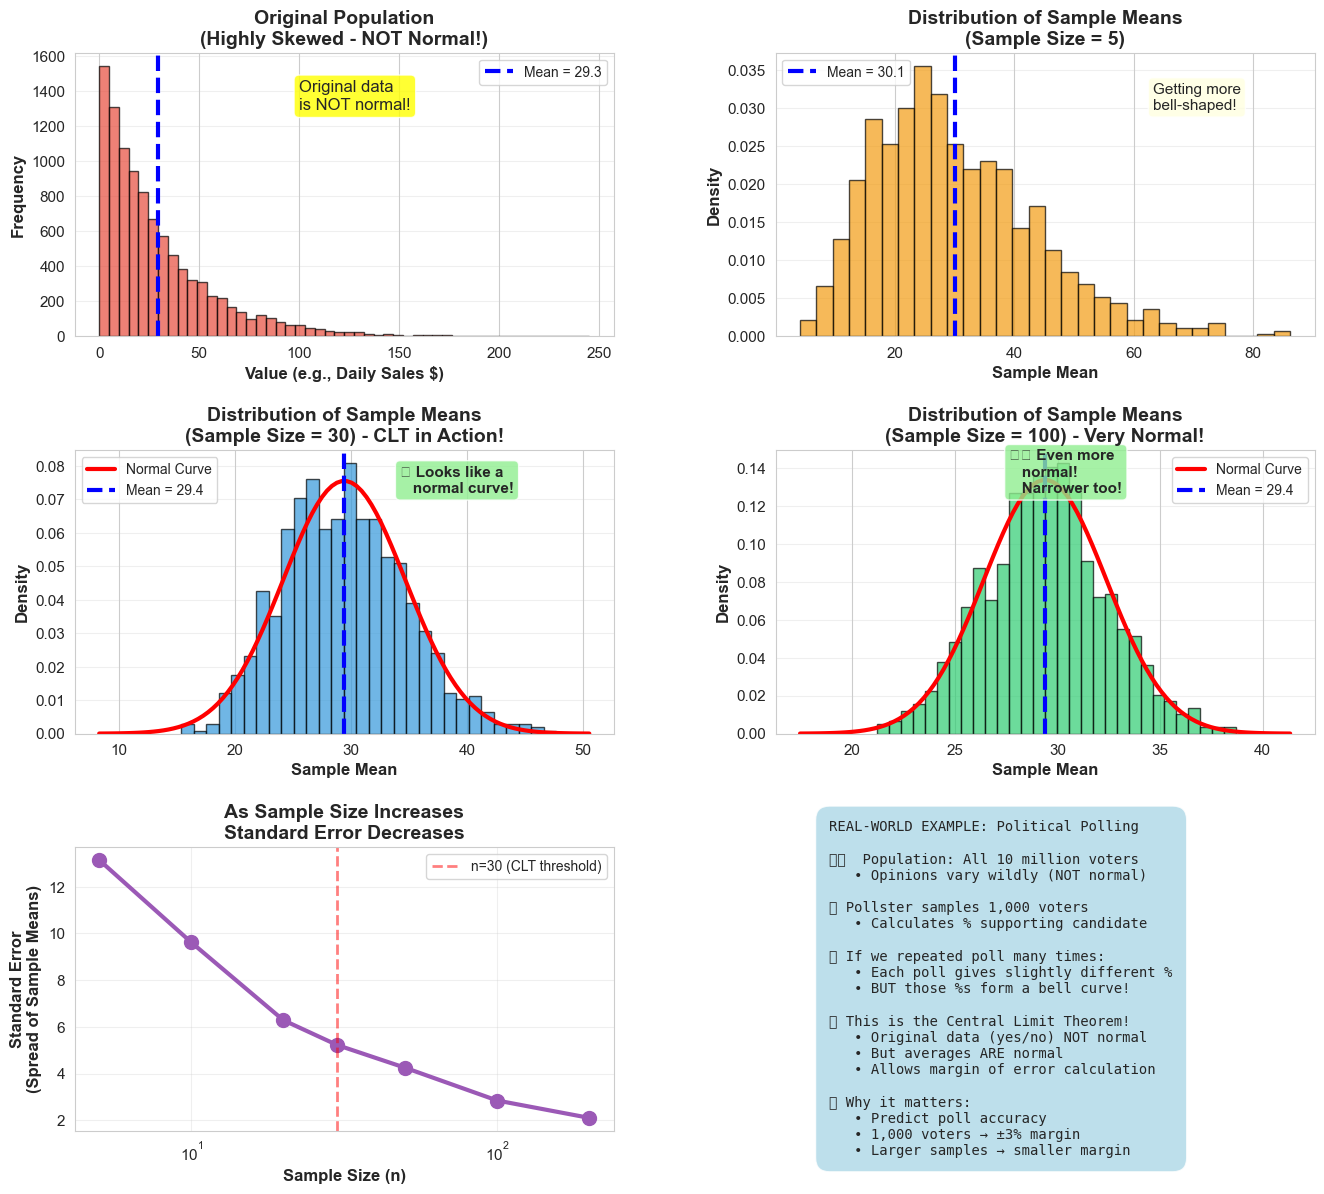


CENTRAL LIMIT THEOREM: INTERACTIVE DEMONSTRATION

📈 Original Population:
   • Mean: 29.32
   • Std Dev: 29.23
   • Shape: Highly skewed (exponential)

📊 Sample Means (n=5):
   • Mean: 30.13
   • Std Error: 13.60

📊 Sample Means (n=30):
   • Mean: 29.42
   • Std Error: 5.28

📊 Sample Means (n=100):
   • Mean: 29.40
   • Std Error: 2.99

📊 KEY TAKEAWAYS:
• CLT: Sample means form a bell curve, even if original data doesn't!
• Works when sample size ≥ 30 (rule of thumb)
• Larger samples → more accurate (smaller standard error)
• This is why polling works and why we trust sample averages!
• Foundation for confidence intervals and hypothesis testing


In [6]:
# SLIDE 14 VISUALIZATION: Central Limit Theorem

fig = plt.figure(figsize=(16, 14))
gs = fig.add_gridspec(3, 2, hspace=0.4, wspace=0.3)

# 1. Original Population: Highly Skewed
ax1 = fig.add_subplot(gs[0, 0])
np.random.seed(42)
population = np.random.exponential(scale=30, size=10000)

ax1.hist(population, bins=50, color='#e74c3c', alpha=0.7, edgecolor='black')
ax1.axvline(np.mean(population), color='blue', linestyle='--', linewidth=3, label=f'Mean = {np.mean(population):.1f}')
ax1.set_xlabel('Value (e.g., Daily Sales $)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title('Original Population\n(Highly Skewed - NOT Normal!)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3, axis='y')
ax1.text(100, ax1.get_ylim()[1]*0.8, 'Original data\nis NOT normal!', fontsize=12, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

# 2. Distribution of Sample Means (n=5)
ax2 = fig.add_subplot(gs[0, 1])
sample_size_small = 5
num_samples = 1000
sample_means_small = [np.mean(np.random.choice(population, sample_size_small)) for _ in range(num_samples)]

ax2.hist(sample_means_small, bins=30, color='#f39c12', alpha=0.7, edgecolor='black', density=True)
ax2.axvline(np.mean(sample_means_small), color='blue', linestyle='--', linewidth=3, label=f'Mean = {np.mean(sample_means_small):.1f}')
ax2.set_xlabel('Sample Mean', fontsize=12, fontweight='bold')
ax2.set_ylabel('Density', fontsize=12, fontweight='bold')
ax2.set_title(f'Distribution of Sample Means\n(Sample Size = {sample_size_small})', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')
ax2.text(ax2.get_xlim()[1]*0.7, ax2.get_ylim()[1]*0.8, 'Getting more\nbell-shaped!', fontsize=11, bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

# 3. Distribution of Sample Means (n=30)
ax3 = fig.add_subplot(gs[1, 0])
sample_size_medium = 30
sample_means_medium = [np.mean(np.random.choice(population, sample_size_medium)) for _ in range(num_samples)]

ax3.hist(sample_means_medium, bins=30, color='#3498db', alpha=0.7, edgecolor='black', density=True)

mu, sigma = np.mean(sample_means_medium), np.std(sample_means_medium)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
ax3.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=3, label='Normal Curve')
ax3.axvline(mu, color='blue', linestyle='--', linewidth=3, label=f'Mean = {mu:.1f}')
ax3.set_xlabel('Sample Mean', fontsize=12, fontweight='bold')
ax3.set_ylabel('Density', fontsize=12, fontweight='bold')
ax3.set_title(f'Distribution of Sample Means\n(Sample Size = {sample_size_medium}) - CLT in Action!', fontsize=14, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3, axis='y')
ax3.text(ax3.get_xlim()[1]*0.65, ax3.get_ylim()[1]*0.85, '✓ Looks like a\n   normal curve!', fontsize=11, fontweight='bold', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# 4. Distribution of Sample Means (n=100)
ax4 = fig.add_subplot(gs[1, 1])
sample_size_large = 100
sample_means_large = [np.mean(np.random.choice(population, sample_size_large)) for _ in range(num_samples)]

ax4.hist(sample_means_large, bins=30, color='#2ecc71', alpha=0.7, edgecolor='black', density=True)

mu, sigma = np.mean(sample_means_large), np.std(sample_means_large)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
ax4.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=3, label='Normal Curve')
ax4.axvline(mu, color='blue', linestyle='--', linewidth=3, label=f'Mean = {mu:.1f}')
ax4.set_xlabel('Sample Mean', fontsize=12, fontweight='bold')
ax4.set_ylabel('Density', fontsize=12, fontweight='bold')
ax4.set_title(f'Distribution of Sample Means\n(Sample Size = {sample_size_large}) - Very Normal!', fontsize=14, fontweight='bold')
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3, axis='y')
ax4.text(ax4.get_xlim()[1]*0.65, ax4.get_ylim()[1]*0.85, '✓✓ Even more\n   normal!\n   Narrower too!', fontsize=11, fontweight='bold', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# 5. Standard Error vs Sample Size
ax5 = fig.add_subplot(gs[2, 0])
sample_sizes = [5, 10, 20, 30, 50, 100, 200]
standard_errors = []

for n in sample_sizes:
    sample_means = [np.mean(np.random.choice(population, n)) for _ in range(500)]
    standard_errors.append(np.std(sample_means))

ax5.plot(sample_sizes, standard_errors, 'o-', linewidth=3, markersize=10, color='#9b59b6')
ax5.set_xlabel('Sample Size (n)', fontsize=12, fontweight='bold')
ax5.set_ylabel('Standard Error\n(Spread of Sample Means)', fontsize=12, fontweight='bold')
ax5.set_title('As Sample Size Increases\nStandard Error Decreases', fontsize=14, fontweight='bold')
ax5.grid(True, alpha=0.3)
ax5.set_xscale('log')
ax5.axvline(30, color='red', linestyle='--', linewidth=2, alpha=0.5, label='n=30 (CLT threshold)')
ax5.legend(fontsize=10)

# 6. Real-World Example
ax6 = fig.add_subplot(gs[2, 1])
ax6.axis('off')

explanation = (
    "REAL-WORLD EXAMPLE: Political Polling\n\n"
    "🗳️  Population: All 10 million voters\n"
    "   • Opinions vary wildly (NOT normal)\n\n"
    "📊 Pollster samples 1,000 voters\n"
    "   • Calculates % supporting candidate\n\n"
    "🔄 If we repeated poll many times:\n"
    "   • Each poll gives slightly different %\n"
    "   • BUT those %s form a bell curve!\n\n"
    "✨ This is the Central Limit Theorem!\n"
    "   • Original data (yes/no) NOT normal\n"
    "   • But averages ARE normal\n"
    "   • Allows margin of error calculation\n\n"
    "💡 Why it matters:\n"
    "   • Predict poll accuracy\n"
    "   • 1,000 voters → ±3% margin\n"
    "   • Larger samples → smaller margin"
)

ax6.text(0.1, 0.5, explanation, fontsize=10, verticalalignment='center', family='monospace', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8, pad=1))

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("CENTRAL LIMIT THEOREM: INTERACTIVE DEMONSTRATION")
print("="*70)

print(f"\n📈 Original Population:")
print(f"   • Mean: {np.mean(population):.2f}")
print(f"   • Std Dev: {np.std(population):.2f}")
print(f"   • Shape: Highly skewed (exponential)")

print(f"\n📊 Sample Means (n=5):")
print(f"   • Mean: {np.mean(sample_means_small):.2f}")
print(f"   • Std Error: {np.std(sample_means_small):.2f}")

print(f"\n📊 Sample Means (n=30):")
print(f"   • Mean: {np.mean(sample_means_medium):.2f}")
print(f"   • Std Error: {np.std(sample_means_medium):.2f}")

print(f"\n📊 Sample Means (n=100):")
print(f"   • Mean: {np.mean(sample_means_large):.2f}")
print(f"   • Std Error: {np.std(sample_means_large):.2f}")

print("\n📊 KEY TAKEAWAYS:")
print("• CLT: Sample means form a bell curve, even if original data doesn't!")
print("• Works when sample size ≥ 30 (rule of thumb)")
print("• Larger samples → more accurate (smaller standard error)")
print("• This is why polling works and why we trust sample averages!")
print("• Foundation for confidence intervals and hypothesis testing")

---
# 🎉 Summary: Slides 10-14

## What We Covered:

**Slide 10 - Continuous Distributions:**
- Normal: bell curve, most common
- Uniform: all values equally likely
- Exponential: waiting times
- Beta: uncertainty about probabilities

**Slide 11 - Normal Distribution:**
- 68-95-99.7 rule
- Defined by mean and standard deviation

**Slide 12 - Binomial Distribution:**
- Counting successes in fixed trials
- Perfect for A/B testing

**Slide 13 - Uniform Distribution:**
- All outcomes equally likely
- Fair randomness

**Slide 14 - Central Limit Theorem:**
- Sample means form normal distribution
- Works even when original data isn't normal!
- Foundation for statistical inference

---

## 🔑 Most Important Concept:

The **Central Limit Theorem** is the bridge between probability and statistics. It tells us that we can use the normal distribution to make inferences about populations, even when we only have a sample. This is why statistics works!

---